### Area calculation

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
example_file = '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CMIP6/CMIP6v1.1_DLR1.0_ssp119_road_MISC_201501-210012.nc'
global_data = xr.open_dataset(example_file).drop('lev')
global_data

<xarray.Dataset>
Dimensions:    (time: 1032, bnds: 2, lon: 720, lat: 360, lev: 1)
Coordinates:
  * time       (time) object 2015-01-16 00:00:00 ... 2100-12-16 00:00:00
  * lon        (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat        (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Dimensions without coordinates: bnds, lev
Data variables:
    time_bnds  (time, bnds) object ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    CO_flux    (time, lev, lat, lon) float32 ...
    NH3_flux   (time, lev, lat, lon) float32 ...
    NOx_flux   (time, lev, lat, lon) float32 ...
    SO2_flux   (time, lev, lat, lon) float32 ...
Attributes: (12/38)
    CDI:                        Climate Data Interface version 1.9.6 (http://...
    Conventions:                CF-1.6
    history:                    Wed Nov 04 22:48:38 2020: cdo -O -Q copy /scr...
    source:                     IAMC Scenario Database hosted at IIASA
    institution:                Integrated Assessment Modeling Consortium
    reference1:                 Lamarque et al.(2010), doi:10.5194/acp-10-701...
    ...                         ...
    variable_id:                OC_em_anthro
    license:                    ScenarioMIP gridded emissions data produced b...
    data_usage_tips:            Note that these are monthly average fluxes. N...
    reporting_unit:             Mass flux of OC, reported as carbon mass
    tracking_id:                hdl:21.14100/1c87266e-b32b-496a-8053-06333664...
    CDO:                        Climate Data Operators version 1.9.6 (http://...

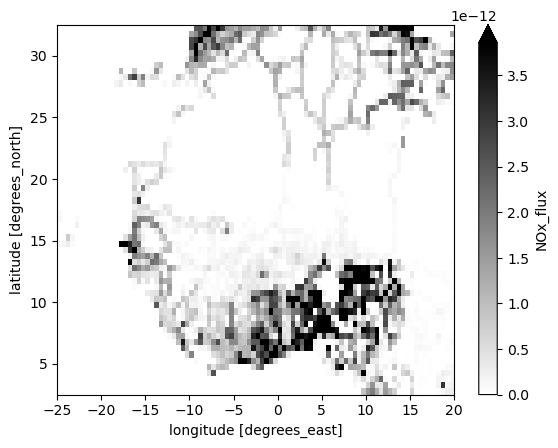

In [4]:
# selecting only West Africa:

wafrica_data = global_data.isel(lat=slice(185, 245), lon = slice(310,400))
wafrica_data['NOx_flux'].mean('time').plot(robust=True, cmap=plt.cm.binary)

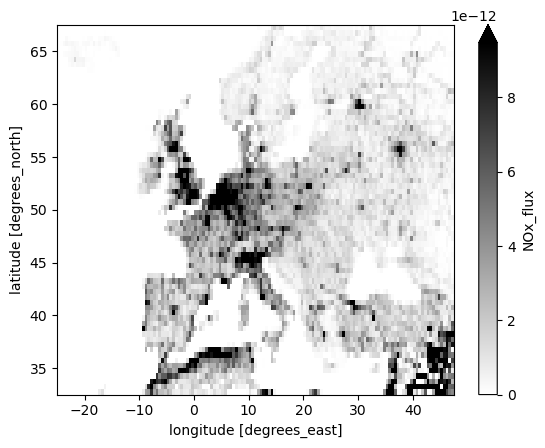

In [5]:
# selecting only Europe:

europe_data = global_data.isel(lat=slice(245, 315), lon = slice(310,455))
europe_data['NOx_flux'].mean('time').plot(robust=True, cmap=plt.cm.binary)

In [6]:
seconds_in_year = 31536000 #s
area_earth = 5.1006447295*pow(10,14) #m2
NO2_molar_mass = 46.006 #g/mol
NO_molar_mass =  30.006 #g/mol

## We can compare different ways to calculate the area of a spheroidal parallelogram with the area of Earth

In [7]:
lats_eu = europe_data.lat
lons_eu = europe_data.lon 

In [8]:
lats_wa = wafrica_data.lat
lons_wa = wafrica_data.lon

In [9]:
lats_glob = global_data.lat
lons_glob = global_data.lon

# Method I: sinusoidal projection

In [10]:
def reproject(latitude, longitude):
    """Returns the x & y coordinates in meters using a sinusoidal projection"""
    from math import pi, cos, radians
    earth_radius = 6371009 # in meters
    lat_dist = pi * earth_radius / 180.0

    y = [lat * lat_dist for lat in latitude]
    x = [long * lat_dist * cos(radians(lat)) 
                for lat, long in zip(latitude, longitude)]
    return x, y

def area_of_polygon(lats, lons):
    x, y = reproject(lats, lons)
    """Calculates the area of an arbitrary polygon given its verticies"""
    area = 0.0
    for i in range(-1, len(x)-1):
        area += x[i] * (y[i+1] - y[i-1])
    return abs(area) / 2.0

In [14]:
area_global = area_of_polygon(lats_glob, lons_glob)
area_global.item()/area_earth

0.24828802670786418

# Method II

In [18]:
from area import area

def area_polygon(coordinates):
    obj = {'type':'Polygon','coordinates':coordinates}
    return area(obj)

In [20]:
area_polygon([[[-180,-90],[-180,90],[180,90],[180,-90],[-180,-90]]])/area_earth

1.0022417174817098

In [22]:
lat1_eu = lats_eu[0]
lat2_eu = lats_eu[-1:]

lon1_eu = lons_eu[0]
lon2_eu = lons_eu[-1:]

In [23]:
lats_glob

<xarray.DataArray 'lat' (lat: 360)>
array([-89.75, -89.25, -88.75, ...,  88.75,  89.25,  89.75])
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y
    bounds:         lat_bnds

In [24]:
area_europe = area_polygon([[[lon1_eu,lat1_eu],[lon1_eu,lat2_eu],[lon2_eu,lat2_eu],[lon2_eu,lat1_eu],[lon1_eu,lat1_eu]]])

In [26]:
area_europe.item()/area_earth


0.03820811024126768

In [27]:
lat1_wa = lats_wa[0]
lat2_wa = lats_wa[-1:]

lon1_wa = lons_wa[0]
lon2_wa = lons_wa[-1:]

In [28]:
area_wafrica = area_polygon([[[lon1_wa,lat1_wa],[lon1_wa,lat2_wa],[lon2_wa,lat2_wa],[lon2_wa,lat1_wa],[lon1_wa,lat1_wa]]])

In [29]:
area_wafrica.item()/area_earth


0.030082311931009922